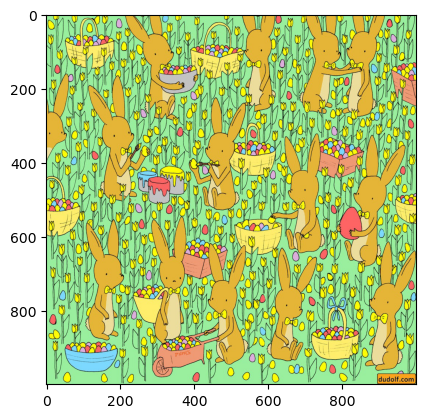

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


image_folder = '/home/longvv/Image-Processing/Finding-Counting-ImageSet/Finding-Counting-ImageSet/Counting/rabbit.jpeg'
image_path = []

for i in range(1, 3):
    image_path.append(image_folder)

#we will use mpimg.imread here to use matplotlib, and instantly convert image to numpy form
image = mpimg.imread(image_path[0])
plt.imshow(image)

(58, 58, 3)


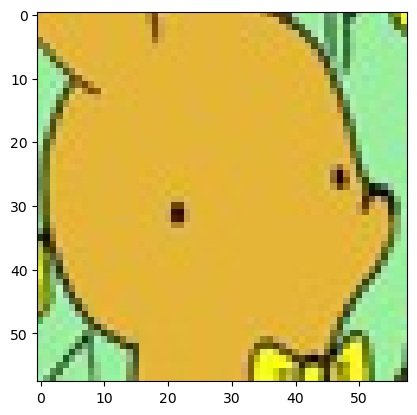

In [27]:
# ok for this image, we can clearly see that the rabbit head is pretty unique
# let take their head 
object = mpimg.imread('/home/longvv/Image-Processing/Finding-Counting-ImageSet/Finding-Counting-ImageSet/Counting/rabbit_head/1.jpg')
print(object.shape)
plt.imshow(object)

path = '/home/longvv/Image-Processing/Finding-Counting-ImageSet/Finding-Counting-ImageSet/Counting/rabbit_head'
object_path = []
for i in range(1, 3):
    object_path.append(path + '/' + str(i) + '.jpg')

object_set = []
for i in object_path:
    object_set.append(mpimg.imread(i))

In [28]:
def euclid_distance(img1, img2):
    ans = 0
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            ans += np.sum((img1[i, j, :] - img2[i, j, :])**2)
    return ans

def rescaled_image_set(img, ratio):
    img_set = []
    for r in ratio:
        new_img_size = (int(img.shape[0] * r), int(img.shape[1] * r))
        new_img = cv2.resize(img, new_img_size)
        img_set.append(new_img)
    return img_set

# this time the rabbit head look pretty much the same (in size), let adjust our scaling a little bit
# and we need to take top k position (because there are many rabbits)

def get_bounding_box(img, object_set):
    ratio = np.linspace(0.8, 1, 3)
   
    stride = 6
    score = np.zeros((2, 3, img.shape[0], img.shape[1]))
    arr = []
    for o, object in enumerate(object_set):
        rescaled_imgs = rescaled_image_set(object, ratio)
        for r, rescaled_img in enumerate(rescaled_imgs):
            #print(f'checking for ratio : {ratio[r]}---------------------')

            for i in range(0, img.shape[0] - rescaled_img.shape[0], stride):
                for j in range(0, img.shape[1] - rescaled_img.shape[1], stride):

                    crop = img[i:i + rescaled_img.shape[0], j:j + rescaled_img.shape[1], :]
                    euclid_dis =  euclid_distance(rescaled_img, crop) / (ratio[r]**2) 
                    score[o, r, i, j] = euclid_dis
                    arr.append(score[o, r, i, j])
                
    arr.sort()
    
    bbox = []
    topk = 20
    for o, object in enumerate(object_set):
        for r, rescaled_img in enumerate(rescaled_imgs):
            for i in range(0, img.shape[0] - rescaled_img.shape[0], stride):
                for j in range(0, img.shape[1] - rescaled_img.shape[1], stride):

                    if (score[o, r, i, j] < arr[topk] and score[o, r, i, j] > 0):
                        #print((j, i, rescaled_img.shape[0], rescaled_img.shape[1]))
                        bbox.append((j, i, rescaled_img.shape[0], rescaled_img.shape[1]))
    

    return bbox



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

def find_object(image, object_set):
    
    fig, ax = plt.subplots()
    ax.imshow(image)
    bound_box = get_bounding_box(image, object_set)
    #print(bound_box)
    for bbox in bound_box:
        #print(bbox)
        bounding_box = patches.Rectangle((bbox[0],bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(bounding_box)
    
    plt.show()

find_object(image, object_set)